# Discrete Distributions and the Basics of Statistical Inference

This lecture introduces the basic building blocks that we'll use throughout the course. We start with common distributions for discrete random variables. Then we discuss some basics of statistical inference: maximum likelihood estimation, asymptotic normality, hypothesis tests, confidence intervals, and Bayesian inference.



## Types of Discrete Data
  - **Categorical:** observations in set $\{1,\ldots,K\}$. 
  - **Counts:** observations in set $\{0,1,\ldots,N\}$ (in some cases, $N$ can go to $\infty$)
  - **Nominal vs ordinal:** ordinal r.v.'s have a natural ordering; nominal r.v.'s just have names.
  - **Other dichotomies:** explanatory vs response; quantitative vs qualitative; interval, ratio...

## Bernoulli Distribution
Toss a (biased) coin where the probability of heads is $p \in [0,1]$. Let $X=1$ denote the event that a coin flip comes up heads and $X=0$ it comes up tails. The random variable $X$ follows a Bernoulli distribution,
\begin{align*}
X \sim \mathrm{Bern}(p)
\end{align*}

We denote its **probability mass function (pmf)** by,

\begin{align*}
\mathrm{Bern}(x; p) 
=
\begin{cases}
p & \text{if } x = 1 \\
1 - p &\text{if } x = 0
\end{cases}
\end{align*}
or more succinctly
\begin{align*}
\mathrm{Bern}(x; p) = p^x (1-p)^{1-x}.
\end{align*}

(We will use this mildly overloaded nomenclature to represent both the _distribution_ $\mathrm{Bern}(p)$ and its _pmf_ $\mathrm{Bern}(x; p)$. The difference will be clear from context.)

The Bernoulli distribution's mean is $\E[X] = p$ and its variance is $\Var[X] = p(1-p)$.



## Binomial Distribution
Now toss the same biased coin $n$ times independently and let
\begin{align*}
X_i &\iid\sim \mathrm{Bern}(p) & \text{for } i&=1,\ldots, n
\end{align*} 
denote the outcomes of each trial. 

The number of heads, $X = \sum_{i=1}^n X_i$, is a random variable taking values $X \in \{0,\ldots,n\}$. It follows a binomial distribution,
\begin{align*}
X \sim \mathrm{Bin}(n, p)
\end{align*}
with pmf
\begin{align*}
\mathrm{Bin}(x; n, p) = {n \choose x} p^x (1-p)^{n-x}.
\end{align*}

Its mean and variance are $\E[X] = np$ and $\Var[X] = np(1-p)$, respectively.



## Poisson Distribution
Now let $n \to \infty$ and $p \to 0$ while the product $np = \lambda$ stays constant. For example, instead of coin flips, suppose we're modeling spikes fired by a neuron in a 1 second interval of time. For simplicity, assume we divide the 1 second interval into $n$ equally sized bins, each of width $1/n$ seconds. Suppose probability of seeing at least one spike in a bin is proportional to the bin width, $p=\lambda / n$, where $\lambda \in \reals_+$ is the _rate_. (For now, assume $\lambda < n$ so that $p < 1$.) Moreover, suppose each bin is independent. Then the number of bins with at least one spike is binomially distributed,
\begin{align*}
X \sim \mathrm{Bin}(n, \lambda / n).
\end{align*}

Intuitively, the number of bins shouldn't really matter &mdash; it just determines our resolution for detecting spikes. We really care about is the number of spikes, which is separate from the binning process.
As $n \to \infty$, the number of spikes in the unit interval converges to a Poisson random variable,
\begin{align*}
X \sim \mathrm{Po}(\lambda).
\end{align*}
Its pmf is,
\begin{align*}
\mathrm{Po}(x; \lambda) &= \frac{1}{x!} e^{-\lambda} \lambda^x.
\end{align*}

Its mean and variance are both $\lambda$. The fact that the mean equals the variance is a defining property of the Poisson distribution, but it's not always an appropriate modeling assumption. We'll discuss more general models shortly. 



<!-- 
## Geometric Distribution
Let's go back to our biased coin with probability $p$ of coming up heads. Imagine flipping it repeatedly. How many tails come up before we see our first heads? Let $X \in \{0,1,\ldots\}$ denote this random variable. It follows a geometric distribution,
\begin{align*}
X \sim \mathrm{Geom}(p)
\end{align*}
with pmf
\begin{align*}
\mathrm{Geom}(x; p) &= (1-p)^x p.
\end{align*}
Its mean is $\E[X] = \frac{1-p}{p}$ and its variance is $\frac{1-p}{p^2}$.

## Negative Binomial Distribution
How many tails will we get before we see $r \in \naturals$ heads? That's equivalent to the sum of independent geometric random variables. Let 
\begin{align*}
X_i &\iid\sim \mathrm{Geom}(p) & \text{for } i&=1,\ldots, r
\end{align*}
denote the number of tails between the $(i-1)$ and $i$-th heads. 

Then, the total number of tails before seeing $r$ heads, $X = \sum_{i=1}^r X_i$, is a random variable taking values $X \in \{0,1,\ldots\}$. It follows a negative binomial distribution,
\begin{align*}
X \sim \mathrm{NB}(r, p)
\end{align*}
with pmf
\begin{align*}
\mathrm{NB}(x; r, p) &= {x + r - 1 \choose x} \, (1-p)^x \, p^r.
\end{align*}
We can extend this definition to non-integer $r \in \reals_+$. The coin flipping story doesn't make as much sense, but the pmf generalizes to,
\begin{align*}
\mathrm{NB}(x; r, p) &= \frac{\Gamma(x + r)}{x! \Gamma(r)} \, (1-p)^x \, p^r.
\end{align*}

The negative binomial mean and variance are $\E[X] = \frac{r(1-p)}{p}$ and $\Var[X] = \frac{r (1-p)}{p^2}$, respectively. 

Now let's reparameterize the negative binomial in terms of its mean. Let $\lambda = \frac{r(1-p)}{p}$. Rearranging terms, we have $p=\frac{r}{r + \lambda}$. Now, we can express the variance as $\Var[X] = \lambda ( 1 + \frac{\lambda}{r})$. Their ratio is,
\begin{align*}
\frac{\Var[X]}{\E[X]} &= 1 + \frac{\lambda}{r} \geq 1.
\end{align*}
Thus, the negative binomial distribution is **overdispersed** &mdash; its variance is greater than or equal to its mean. The parameter $r$ determines the dispersion, with larger $r$ being less dispersed. Intuitively, we recover the Poisson distribution in the limit,
\begin{align*}
\lim_{r \to \infty} \mathrm{NB}\left(r, \frac{r}{r + \lambda}\right)
&= \mathrm{Po}(\lambda).
\end{align*}

### Alternative Motivation
Another way to obtain an overdispersed count model is to model the data as _conditionally_ Poisson, but assume the rate is a random variable. For example, suppose 
\begin{align*}
X \mid \lambda &\sim \mathrm{Po}(\lambda) \\
\lambda &\sim \mathrm{Ga}\left(r, \frac{p}{1-p}\right).
\end{align*}
where $\mathrm{Ga}(\alpha, \beta)$ denotes the gamma distribution with shape $\alpha$ and rate $\beta$. The gamma is a distribution on non-negative reals with mean $\alpha / \beta$ and variance $\alpha / \beta^2$.

It turns out that the marginal distribution of $X$, integrating over possible rates $\lambda$, is a negative binomial,
\begin{align*}
\Pr(X = x) 
&= \int_0^\infty \mathrm{Po}(x; \lambda) \, \mathrm{Ga}\left(\lambda; r, \frac{p}{1-p} \right) \dif \lambda \\
&= \mathrm{NB}(x; r, p).
\end{align*}
In other words, we can view the negative binomial distribution as a _gamma-mixed Poisson distribution_. 

There are a few ways to prove the identity above. One is by brute force calculation of the integral; another is by a cool application of the Poisson superposition principle (see [Wikipedia](https://en.wikipedia.org/wiki/Negative_binomial_distribution#Gamma%E2%80%93Poisson_mixture)). For now, let's just check that it passes some basic sanity checks. Namely, let's check that the first two moments match.

Applying the tower property of expectations to the gamma-mixed Poisson model,
\begin{align*}
\E[X] = \E[\E[X \mid \lambda]] = \E[\lambda] = \frac{r}{\frac{p}{1-p}} = \frac{r (1-p)}{p}.
\end{align*}
So far so good &mdash; this is the same as the mean of the negative binomial distribution.

Now apply the "EVVE" rule to compute the marginal variance of the gamma-mixed Poisson model,
\begin{align*}
\Var[X] &= \E[\Var[X \mid \lambda]] + \Var[\E[X \mid \lambda]] \\
&= \E[\lambda] + \Var[\lambda] \\
&= \frac{r}{\beta} \left(1 + \frac{1}{\beta} \right)
\end{align*}
where $\beta = p / (1-p)$. Simplifying this expression yields,
\begin{align*}
\Var[X] &= \frac{r (1-p)}{p^2},
\end{align*}
which matches the variance of the negative binomial distribution. -->


## Categorical Distribution
So far, we've talked about distributions for scalar random variables. Here, we'll extend these ideas to vectors of counts.

Instead of a biased coin, consider a biased _die_ with $K$ faces and corresponding probabilites $\mbpi = (\pi_1, \ldots, \pi_K) \in \Delta_{K-1}$, where 
\begin{align*}
\Delta_{K-1} &= \left\{\mbpi \in \reals_+^K: \sum_k \pi_k = 1 \right\}
\end{align*}
denotes the $(K-1)$-dimensional simplex embedded in $\reals^K$.

Roll the die and let the random variable $X \in \{1,\ldots,K\}$ denote the outcome. It follows a categorical distribution,
\begin{align*}
X &\sim \mathrm{Cat}(\mbpi)
\end{align*}
with pmf
\begin{align*}
\mathrm{Cat}(x; \mbpi) &= \prod_{k=1}^K \pi_k^{\bbI[x=k]}
\end{align*}
where $\bbI[y]$ is an indicator function that returns 1 if $y$ is true and 0 otherwise. This is a natural generalization of the Bernoulli distribution to random variables that can fall into more than two categories.

Alternatively, we can represent $X$ as a **one-hot vector**, in which case $X \in \{\mbe_1, \ldots, \mbe_K\}$ where $\mbe_k = (0, \ldots, 1, \ldots, 0)^\top$ is a one-hot vector with a 1 in the $k$-th position. Then, the pmf is,
\begin{align*}
\mathrm{Cat}(\mbx; \mbpi) &= \prod_{k=1}^K \pi_k^{x_k}
\end{align*}


## Multinomial Distribution
From this representation, it is straightforward to generalize to $n$ independent rolls of the die, just like in the binomial distribution.  Let $Z_i \iid\sim \mathrm{Cat}(\mbpi)$ for $i=1,\ldots,n$ denote the outcomes of each roll, and let $X = \sum_{i=1}^n Z_i$ denote the total number of times the die came up on each of the $K$ faces. Note that $X \in \naturals^K$ is a _vector-valued random variable_. Then, $X$ follows a multinomial distribution,
\begin{align*}
X \sim \mathrm{Mult}(n, \mbpi),
\end{align*}
with pmf,
\begin{align*}
\mathrm{Mult}(\mbx; n, \mbpi) &= \bbI[\mbx \in \cX_n] \cdot {n \choose x_1, \ldots
, x_K} \prod_{k=1}^K \pi_k^{x_k} 
\end{align*}
where $\cX_n = \left\{\mbx \in \naturals^K : \sum_{k=1}^K x_k = n \right\}$ and 
\begin{align*}
{n \choose x_1, \ldots, x_K} &= \frac{n!}{x_1! \cdots x_K!}
\end{align*}
denotes the multinomial function.

The expected value of a multinomial random variable is $\E[X] = n \mbpi$ and the $K \times K$ covariance matrix is,
\begin{align*}
\Cov(X) &= n 
\begin{bmatrix}
\pi_1(1-\pi_1) & -\pi_1 \pi_2 & \ldots & -\pi_1 \pi_K \\
-\pi_2 \pi_1 & \pi_2 (1-\pi_2) & \ldots & -\pi_2 \pi_K \\
\vdots & \vdots & \vdots & \vdots \\
-\pi_K \pi_1 & -\pi_K \pi_2 & \ldots & \pi_K (1- \pi_K)
\end{bmatrix}
\end{align*}
with entries 
\begin{align*}
[\Cov[X]]_{ij} &= 
\begin{cases}
n \pi_i (1-\pi_i) & \text{if } i = j \\
-n \pi_i \pi_j & \text{if } i \neq j \\
\end{cases}
\end{align*}



### Poisson / Multinomial Connection

Suppose we have a collection of independent (but not identically distributed) Poisson random variables,
\begin{align*}
X_i &\sim \mathrm{Po}(\lambda_i) & \text{for } i&=1,\ldots,K.
\end{align*}
Due to their independence, the sum $X_\bullet = \sum_{i=1}^K X_i$ is Poisson distributed as well,
\begin{align*}
X_\bullet &\sim \mathrm{Po}\left( \sum_{i=1}^K \lambda_k \right)
\end{align*}
(We'll use this $X_\bullet$ notation more next time.)

Conditioning on the sum renders the counts _dependent_. (They have to sum to a fixed value, so they can't be independent!) Specifically, given the sum, the counts follow a multinomial distribution,
\begin{align*}
(X_1, \ldots, X_K) \mid X_\bullet = n &\sim \mathrm{Mult}(n, \mbpi)
\end{align*}
where 
\begin{align*}
\mbpi &= \left(\frac{\lambda_1}{\lambda_\bullet}, \ldots, \frac{\lambda_K}{\lambda_\bullet} \right)
\end{align*}
with $\lambda_{\bullet} = \sum_{i=1}^K \lambda_i$. In words, given the sum, the vector of counts is multinomially distributed with probabilities given by the normalized rates.



## Maximum Likelihood Estimation

The distributions above are simple probability models with one or two parameters. How can we estimate those parameters from data? We'll focus on maximum likelihood estimation. 

The log likelihood is the probability of the data viewed as a function of the model parameters $\mbtheta$. Given i.i.d. observations $\{x_i\}_{i=1}^n$, the log likelihood reduces to a sum,
\begin{align*}
\cL(\mbtheta) &= \sum_{i=1}^n \log p(x_i; \theta).
\end{align*}
The maximum likelihood estimate (MLE) is a maximum of the log likelihood,
\begin{align*}
\hat{\mbtheta}_{\mathsf{MLE}} &= \arg\; \max \cL(\mbtheta)
\end{align*}
(Assume for now that there is a single global maximum.)


:::{admonition} Example: MLE for the Bernoulli distribution
:class: tip
Consider a Bernoulli distribution unknown parameter $\theta \in [0,1]$ for the probability of heads. Suppose we observe $n$ independent coin flips
\begin{align*}
X_i &\iid\sim \mathrm{Bern}(\theta) & \text{for } i&=1,\ldots, n.
\end{align*}
Observing $X_i=x_i$ for all $i$, the log likelihood is,
\begin{align*}
\cL(\theta) 
&= \sum_{i=1}^n x_i \log \theta + (1 - x_i) \log (1 - \theta) \\
&= x \log \theta + (n - x) \log (1 - \theta)
\end{align*}
where $x = \sum_{i=1}^n x_i$ is the number of flips that came up heads.

Taking the derivative with respect to $p$,
\begin{align*}
\frac{\dif}{\dif \theta} \cL(\theta) 
&= \frac{x}{\theta} - \frac{n - x}{1 - \theta} \\
&= \frac{x - n\theta}{\theta (1 - \theta)}.
\end{align*}
Setting this to zero and solving for $\theta$ yields the MLE,
\begin{align*}
\hat{\theta}_{\mathsf{MLE}} = \frac{x}{n}.
\end{align*}
Intuitively, the maximum likelihood estimate is the fraction of coin flips that came up heads. Note that we could have equivalently expressed this model as a single observation of $X \sim \mathrm{Bin}(n, \theta)$ and obtained the same result.
:::



## Asymptotic Normality of the MLE
If the data were truly generated by i.i.d. draws from a model with parameter $\mbtheta^\star$, then under certain conditions the MLE is asymptotically normal and achieves the Cramer-Rao lower bound,
\begin{align*}
\sqrt{n} (\hat{\mbtheta}_{\mathsf{MLE}} - \mbtheta^\star) \to \cN(0, \cI(\mbtheta^\star)^{-1})
\end{align*}
in distribution, where $\cI(\mbtheta)$ is the **Fisher information matrix**. We obtain standard error estimates by taking the square root of the diagonal elements of the inverse Fisher information matrix and dividing by $\sqrt{n}$.

### Fisher Information Matrix
The Fisher information matrix is the covariance of the **score function**, the partial derivative of the log likelihood with respect to the parameters. It's easy to confuse yourself with poor notation, so let's try to derive it precisely. 

The log probability is a function that maps two arguments (a data point and a parameter vector) to a scalar, $\log p: \cX \times \Theta \mapsto \reals$.  The score function is the partial derivative with respect to the parameter vector,  which is itself a function, $\nabla_\theta \log p: \cX \times \Theta \mapsto \Theta$.


Now consider $\mbtheta$ fixed and treat $X \sim p(\cdot; \mbtheta)$ as a random variable. The expected value of the score is zero,
\begin{align*}
\E_{X \sim p(\cdot; \mbtheta)}[\nabla_\theta \log p(X; \mbtheta)] 
&= \int_{\cX} p(x; \mbtheta) \nabla_\theta \log p (x; \mbtheta) \dif x \\
&= \int_{\cX} p(x; \mbtheta) \frac{\nabla_\theta p(x; \mbtheta)}{p(x; \mbtheta)} \dif x \\
&= \nabla_\theta \int_{\cX}  p(x; \mbtheta) \dif x \\
&= \nabla_\theta 1 \\
&= \mbzero.
\end{align*}

The Fisher information matrix is the **covariance of the score function**, again treating $\mbtheta$ as fixed,
\begin{align*}
\cI(\mbtheta) 
&= \Cov_{X \sim p(\cdot; \mbtheta)}[\nabla_\theta \log p(X; \mbtheta)]  \\
&= \E_{X \sim p(\cdot; \mbtheta)}[\nabla_\theta \log p(X; \mbtheta) \nabla_\theta \log p(X; \mbtheta)^\top] 
- \underbrace{\E_{X \sim p(\cdot; \mbtheta)}[\nabla_\theta \log p(X; \mbtheta)]}_{\mbzero} \, 
\underbrace{\E_{X \sim p(\cdot; \mbtheta)}[\nabla_\theta \log p(X; \mbtheta)]^\top}_{\mbzero^\top} \\
&= \E_{X \sim p(\cdot; \mbtheta)}[\nabla_\theta \log p(X; \mbtheta) \nabla_\theta \log p(X; \mbtheta)^\top].
\end{align*}
If $\log p$ is twice differentiable (in $\mbtheta$) the under certain regularity conditions, the Fisher information matrix is equivalent to the expected value of the _negative_ Hessian of the log probability, 
\begin{align*}
\cI(\mbtheta) &= - \E_{X \sim p(\cdot; \mbtheta)}\left[ \nabla_\mbtheta^2 \log p (X; \mbtheta) \right]
\end{align*}

:::{admonition} Example: Fisher Information for the Bernoulli Distribution
:class: tip
For a Bernoulli distribution, the log probability and its score were evaluated above,
\begin{align*}
\log p(x; \theta) &= x \log \theta + (1 - x) \log (1 - \theta) \\
\nabla_\theta \log p(x; \theta) &= \frac{x - \theta}{\theta (1 - \theta)}
\end{align*}
The negative Hessian with respect to $\theta$ is,
\begin{align*}
- \nabla^2_\theta \log p(x; \theta) 
&= \frac{x}{\theta^2} + \frac{1 - x}{(1 - \theta)^2}.
\end{align*}
Taking the expectation w.r.t. $X \sim p(\cdot; \theta)$ yields,
\begin{align*}
\cI(\theta) 
&= -\E\left[\nabla^2_\theta \log p(x; \theta) \right] \\
&= \frac{\theta}{\theta^2} + \frac{1- \theta}{(1-\theta)^2} \\
&= \frac{1}{\theta (1 - \theta)}.
\end{align*}
Interestingly, the inverse Fisher information is the $\Var[X; \theta]$. We'll revisit this point later in the course. 
:::


## Hypothesis Testing

Suppose we want to test a null hypothesis $\cH_0: \theta = \theta_0$ for a scalar parameter $\theta \in \reals$. Exploiting the asymptotic normality of the MLE, the test statistic,
\begin{align*}
z &= \frac{\hat{\theta} - \theta_0}{\sqrt{\cI(\hat{\theta})^{-1} / n}}
\end{align*}
approximately follows a standard normal distribution under the null hypothesis. From this we can derive one- or two-sided p-values. (We dropped the $\mathsf{MLE}$ subscript on $\hat{\theta}$ to simplify notation.)



### Wald test
Equivalently,
\begin{align*}
z^2 &= \frac{(\hat{\theta} - \theta_0)^2}{\cI(\hat{\theta})^{-1} / n}
\end{align*}
has a chi-squared null distribution with 1 degree of freedom. When the non-null standard error derived from the Fisher information at $\hat{\theta}$ is used to compute the test statistic, it is called a **Wald statistic**. 

For multivariate settings, $\cH_0: \mbtheta = \mbtheta_0$ with $\mbtheta \in \reals^D$, the Wald statistic generalizes to,
\begin{align*}
z^2 
&= (\hat{\mbtheta} - \mbtheta_0)^\top [\cI(\hat{\mbtheta})^{-1} / n]^{-1} (\hat{\mbtheta} - \mbtheta_0) \\
&= n (\hat{\mbtheta} - \mbtheta_0)^\top \cI(\hat{\mbtheta}) (\hat{\mbtheta} - \mbtheta_0),
\end{align*}
which has a chi-squared null distribution with $D$ degrees of freedom. The p-value is then the probability of seeing a value at least as large as $z^2$ under the chi-squared distribution.

Wald tests are one of the three canonical large-sample tests. The other two are the likelihood ratio test and the score test (a.k.a., the Lagrange multiplier test). Asymptotically, they are equivalent, but in finite samples they differ. See {cite:t}`agresti2002categorical` (Sec 1.3.3) for more details.



## Confidence Intervals

In practice, we often care more about estimating confidence intervals for parameters than testing specific hypotheses about their values. Given a hypothesis test with level $\alpha$, like the Wald test above, we can construct a confidence interval with level $1-\alpha$ by taking all $\theta$ for which $\cH_0$ has a p-value exceeding $\alpha$. 

For example, a 95% Wald confidence interval for a scalar parameter is the set,
\begin{align*}
\left\{\theta_0: \frac{|\hat{\theta} - \theta_0|}{\sqrt{\cI(\hat{\theta})^{-1} / n}} < 1.96 \right\} 
&= \hat{\theta} \pm 1.96 \sqrt{\cI(\hat{\theta})^{-1} / n}
\end{align*}
Equivalent confidence intervals can be derived from the tails of the chi-squared distribution. Note that the confidence interval is a function of the observed data from which the MLE is computed.

:::{admonition} Example: Confidence Intervals for a Bernoulli Parameter
:class: tip

Continuing our running example, we found that the MLE of a Bernoulli parameter is $\hat{\theta} = x/n$ and the inverse Fisher information is $\cI(\theta)^{-1} = \theta (1 - \theta)$. Together, these yield a 95% Wald confidence interval of,
\begin{align*}
\hat{\theta} \pm 1.96 \sqrt{\frac{\hat{\theta} ( 1 - \hat{\theta})}{n}}.
\end{align*}
Again, this should be intuitive. If we were estimating the mean of a Gaussian distribution, the variance of the estimator would scale be roughly $1/n$ times the variance of an individual observation. Since $\hat{\theta} ( 1 - \hat{\theta})$ is the variance of a Bernoulli distribution with parameter $\hat{\theta}$, we see similar behavior here.
:::

## Bayesian Inference

It is tempting to interpret the confidence interval as saying that $\theta$ is in the interval with probability $1-\alpha$ given the observed data, but **that is not justified!** In the setting above, the parameter $\theta$ is **not** a random variable. This fallacy is a classic misinterpretation of frequentist confidence intervals. 

To make such a claim, we need to adopt a Bayesian perspective and reason about the _posterior_ distribution of the parameters, $\theta$, given the data, $x$. To obtain a posterior, we first need to specify a _prior_ distribution on parameters, $p(\theta)$. Given a prior and likelihood, the posterior follows from Bayes' rule,
\begin{align*}
p(\theta \mid X) &= \frac{p(X \mid \theta) \, p(\theta)}{p(X)},
\end{align*}
where the denominator is the _marginal likelihood_ $p(x) = \int p(x \mid \theta) \, p(\theta) \dif \theta$. 
To obtain an analogue of frequentist confidence intervals, we may summarize the posterior in terms of a **Bayesian credible interval**: a set of parameters that captures $1-\alpha$ probability under the posterior. There are infinitely many such sets, but a common choice for scalar parameters is the interval ranging from the $\alpha/2$ to the $1-\alpha/2$ quantiles of the posterior distribution.

Note, however, that the posterior credible interval depends on the choice of prior. Indeed, the subjective choice of prior distributions is the source of much of the criticism of Bayesian approaches. In cases where we truly know nothing about the parameter _a priori_, we can often specify "weak" or "uninformative" prior distributions. Under such assumptions, we'll find that Bayesian and frequentist approaches can yield similar estimates, with the advantage that the Bayesian credible interval admits the intuitive interpretation as a set where $\theta$ is most probable. 

:::{admonition} Example: Bayesian Credible Intervals for a Bernoulli Parameter
:class: tip

For a Bernoulli model, we often choose a **conjugate prior** distribution,
\begin{align*}
\theta &\sim \mathrm{Beta}(\alpha, \beta)
\end{align*}
with support on $\theta \in [0,1]$. Its probability density function (pdf) is,
\begin{align*}
p(\theta; \alpha, \beta) &= \frac{1}{\mathrm{B}(\alpha, \beta)} \theta^{\alpha - 1} (1 - \theta)^{\beta - 1},
\end{align*}
where $\mathrm{B}(\alpha, \beta)$ is the beta function and the hyperparameters $\alpha, \beta \in \reals_+$ determine the shape of the prior. When $\alpha = \beta = 1$, the prior reduces to a uniform distribution on $[0,1]$.

Under the beta prior, the posterior distribution over $\theta$ is,
\begin{align*}
p(\theta \mid \{x_i\}_{i=1}^n) 
&\propto \mathrm{Beta}(\theta; \alpha, \beta) \prod_{i=1}^n p(x_i \mid \theta) \\
&\propto \theta^{\alpha - 1} (1 - \theta)^{\beta - 1} \prod_{i=1}^n \theta^{x_i} (1 - \theta)^{1 - x_i} \\
&= \theta^{x + \alpha - 1} (1- \theta)^{n - x + \beta - 1} \\
&\propto \mathrm{Beta}(\theta; x + \alpha, n - x + \beta)
\end{align*}
where $x = \sum_{i=1}^n x_i$ is the number of coins that came up heads.

The posterior mode &mdash; i.e., the **_maximum a posteriori_ (MAP)** estimate &mdash; is 
\begin{align*}
\hat{\theta}_{\mathsf{MAP}} 
&= \frac{x + \alpha - 1}{n + \alpha + \beta - 2},
\end{align*}
and under an uninformative prior with $\alpha = \beta = 1$, it is equivalent to the MLE, $\hat{\theta}_{\mathsf{MLE}} = x / n$. 

For small samples, Bayesian credible intervals can be derived using the cumulative distribution function (cdf) of the beta distribution, which is given by the incomplete beta function. 

In the large sample limit, the beta posterior is approximately Gaussian.
The variance of the posterior beta distribution is,
\begin{align*}
\Var[\theta \mid X] 
&= \frac{(x + \alpha)(n - x + \beta)}{(n + \alpha + \beta)^2 (n + \alpha + \beta + 1)}
\end{align*}
In this limit, $\alpha$ and $\beta$ are much smaller than $n$ and $x$. Thus, the posterior variance is approximately
\begin{align*}
\Var[\theta \mid X] \approx \frac{x(n - x)}{n^3} 
= \frac{\hat{\theta}_{\mathsf{MLE}} (1 - \hat{\theta}_{\mathsf{MLE}})}{n}
= \cI(\hat{\theta}_{\mathsf{MLE}})^{-1} / n,
\end{align*}
and the Bayesian credible intervals match the Wald confidence interval.
:::



## Demo: College Football National Championship

Finally, let's end with a little demo. The College Football National Championship game is tonight between the Michigan Wolverines and the Washington Huskies! In class, I asked you to guess the final score for each team, mod 10. That's a discrete random variable! Let's look at some data from this season and see if we can make an informed prediction.

In [1]:
# Setup
import torch 
import matplotlib.pyplot as plt
import pandas as pd

from collections import defaultdict

/Users/scott/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Poll Results

In [16]:
responses = pd.read_csv("https://docs.google.com/spreadsheets/d/1lul-n2MiIh7acE47zagJ_4WsPbgRHy9e04ZUJmeVf40/export?format=csv")
responses.head(1)

,Timestamp,Name,Net ID,Are you comfortable programming in Python?,Have you used PyTorch before?,Please select up to three time slots when would you like us to hold office hours. (Assignments will be due roughly every other Friday at midnight.) [Monday],Please select up to three time slots when would you like us to hold office hours. (Assignments will be due roughly every other Friday at midnight.) [Tuesday],Please select up to three time slots when would you like us to hold office hours. (Assignments will be due roughly every other Friday at midnight.) [Wednesday],Please select up to three time slots when would you like us to hold office hours. (Assignments will be due roughly every other Friday at midnight.) [Thursday],Please select up to three time slots when would you like us to hold office hours. (Assignments will be due roughly every other Friday at midnight.) [Friday],How many points (mod 10) do you think the Michigan Wolverines will score in the College Football Championship tonight?,How many points (mod 10) do you think the Washington Huskies will score in the College Football Championship tonight?
0,1/7/2024 19:03:20,Scott Linderman,swl1,Yes,Yes,NaN,NaN,NaN,NaN,NaN,1,4


In [17]:
predicted_scores = torch.tensor(responses[responses.columns[-2:]].values, dtype=torch.float32)
predicted_hist = torch.histogramdd(predicted_scores, bins=10, range=[0, 10, 0, 10], density=True)

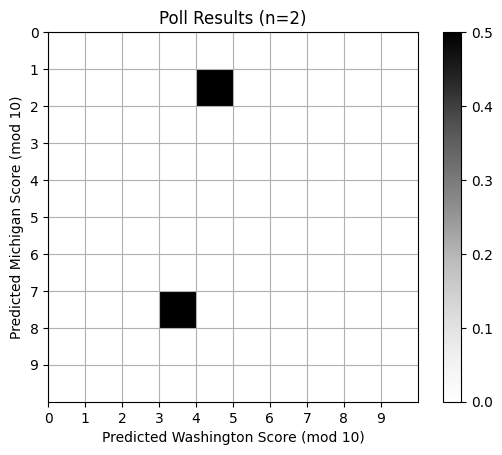

In [18]:
# Plot the histogram
plt.imshow(predicted_hist.hist, extent=(0, 10, 10, 0), cmap="Greys")
plt.xticks(torch.arange(10))
plt.yticks(torch.arange(10))
plt.xlabel("Predicted Washington Score (mod 10)")
plt.ylabel("Predicted Michigan Score (mod 10)")
plt.title(f"Poll Results (n={len(predicted_scores)})")
plt.grid(True)
_ = plt.colorbar()

### Compare to Actual Scores

Now let's compare to actual scores from this season. This data is from [https://collegefootballdata.com/](https://collegefootballdata.com/).

In [5]:
allgames = pd.read_csv("https://raw.githubusercontent.com/slinderman/stats305b/winter2024/data/01_allgames.csv")
allgames.head(10)

,Id,Season,Week,Season Type,Start Date,Start Time Tbd,Completed,Neutral Site,Conference Game,Attendance,...,Away Conference,Away Division,Away Points,Away Line Scores,Away Post Win Prob,Away Pregame Elo,Away Postgame Elo,Excitement Index,Highlights,Notes
0,401550883,2023,1,regular,2023-08-26T17:00:00.000Z,False,True,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,401525434,2023,1,regular,2023-08-26T18:30:00.000Z,False,True,True,False,49000.0,...,American Athletic,fbs,3.0,NaN,0.001042,1471.0,1385.0,1.346908,NaN,NaN
2,401540199,2023,1,regular,2023-08-26T19:30:00.000Z,False,True,True,False,NaN,...,UAC,fcs,7.0,NaN,0.025849,NaN,NaN,6.896909,NaN,NaN
3,401520145,2023,1,regular,2023-08-26T21:30:00.000Z,False,True,False,True,17982.0,...,Conference USA,fbs,14.0,NaN,0.591999,1369.0,1370.0,6.821333,NaN,NaN
4,401525450,2023,1,regular,2023-08-26T23:00:00.000Z,False,True,False,False,15356.0,...,FBS Independents,fbs,41.0,NaN,0.760751,1074.0,1122.0,5.311493,NaN,NaN
5,401532392,2023,1,regular,2023-08-26T23:00:00.000Z,False,True,False,False,23867.0,...,Mid-American,fbs,13.0,NaN,0.045531,1482.0,1473.0,6.547378,NaN,NaN
6,401540628,2023,1,regular,2023-08-26T23:00:00.000Z,False,True,False,False,NaN,...,Patriot,fcs,13.0,NaN,0.077483,NaN,NaN,5.608758,NaN,NaN
7,401520147,2023,1,regular,2023-08-26T23:30:00.000Z,False,True,False,False,21407.0,...,Mountain West,fbs,28.0,NaN,0.819154,1246.0,1241.0,5.282033,NaN,NaN
8,401539999,2023,1,regular,2023-08-26T23:30:00.000Z,False,True,True,False,NaN,...,MEAC,fcs,7.0,NaN,0.001097,NaN,NaN,3.122344,NaN,NaN
9,401523986,2023,1,regular,2023-08-27T00:00:00.000Z,False,True,False,False,63411.0,...,Mountain West,fbs,28.0,NaN,0.001769,1462.0,1412.0,1.698730,NaN,NaN


In [6]:
past_scores = torch.tensor(allgames[["Home Points", "Away Points"]].values, dtype=torch.float32)
past_hist = torch.histogramdd(past_scores % 10, bins=10, range=[0, 10, 0, 10], density=True)

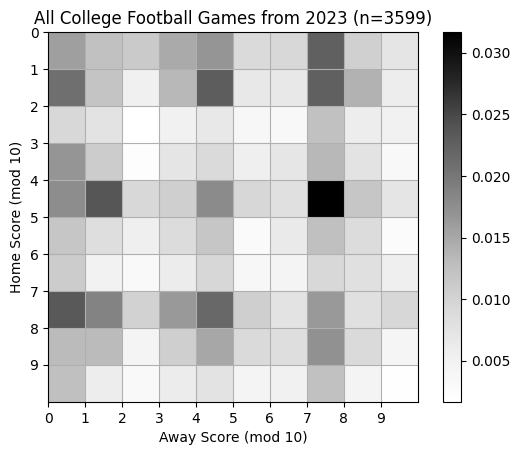

In [7]:
# Plot the histogram
plt.imshow(past_hist.hist, extent=(0, 10, 10, 0), cmap="Greys")
plt.xticks(torch.arange(10))
plt.yticks(torch.arange(10))
plt.xlabel("Away Score (mod 10)")
plt.ylabel("Home Score (mod 10)")
plt.title(f"All College Football Games from 2023 (n={len(past_scores)})")
plt.grid(True)
_ = plt.colorbar()

### Multinomial Model of Individual Drives

Could we predict a distribution like this based on the outcomes of individual drives? 

In [8]:
umdrives = pd.read_csv("https://raw.githubusercontent.com/slinderman/stats305b/winter2024/data/01_umdrives.csv")
uwdrives = pd.read_csv("https://raw.githubusercontent.com/slinderman/stats305b/winter2024/data/01_uwdrives.csv")

def compute_drive_probs(drives):
    """Returns probabilities for number of points scored on each drive.
    Even though the number of points can only be 0, 3, or 7 with the granularity 
    of this dataset, we encode the result as probabilities of integers [0, ..., 10).
    """
    points = drives["Drive Result"].map(defaultdict(int, TD=7, FG=3))
    probs = torch.histogram(torch.tensor(points.values, dtype=torch.float32),
                            bins=10, range=[0, 10], density=True)
    return probs.hist, len(points)

# Compute probabilities of points scored/allowed on offense/defense by each team
um_off_probs, um_off_n = compute_drive_probs(umdrives[umdrives["Offense"] == "Michigan"])
um_def_probs, um_def_n = compute_drive_probs(umdrives[umdrives["Defense"] == "Michigan"])
uw_off_probs, uw_off_n = compute_drive_probs(uwdrives[uwdrives["Offense"] == "Washington"])
uw_def_probs, uw_def_n = compute_drive_probs(uwdrives[uwdrives["Defense"] == "Washington"])

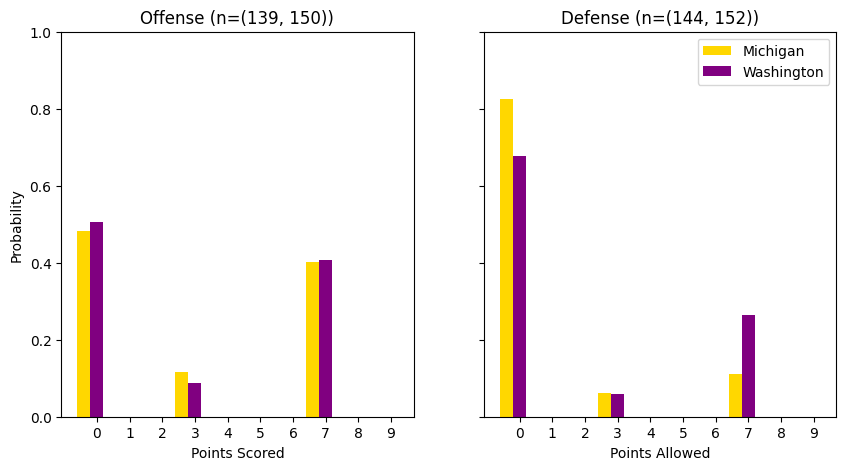

In [9]:
# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
axs[0].bar(torch.arange(10)-.4, um_off_probs, width=0.4, color='gold', label="Michigan")
axs[0].bar(torch.arange(10), uw_off_probs, width=0.4, color='purple', label="Washington")
axs[0].set_title(f"Offense (n={um_off_n, uw_off_n})")
axs[1].bar(torch.arange(10)-.4, um_def_probs, width=0.4, color='gold', label="Michigan")
axs[1].bar(torch.arange(10), uw_def_probs, width=0.4, color='purple', label="Washington")
axs[1].set_title(f"Defense (n={um_def_n, uw_def_n})")
axs[1].legend()
axs[0].set_xticks(torch.arange(10))
axs[0].set_ylim(0, 1)
axs[0].set_xlabel("Points Scored")
axs[1].set_xlabel("Points Allowed")
_ = axs[0].set_ylabel("Probability")

If you've followed college football this season, then you won't be surprised to see Michigan's defense giving up so few points per drive. It is rather surprising to me that Washington's high-flying offense isn't scoring that many more points than Michigan &mdash; the Washington offense looks amazing! 

### Simulations

Anyway, suppose that the offense and defense meet in the middle. Suppose there are 11 drives per team per game &mdash; what would the distribution of scores was drawn from these distributions?

In [10]:
from torch.distributions import Multinomial
torch.manual_seed(305)

# Compute average of UM offense points scored and UW defense points allowed, and vice-versa.
um_avg_probs = 0.5 * (um_off_probs + uw_def_probs)
uw_avg_probs = 0.5 * (uw_off_probs + um_def_probs)

# Add a small probability of a missed PAT and a 2pt conversion
um_avg_probs = 0.98 * um_avg_probs + 0.01 * (torch.arange(10) == 6) + 0.01 * (torch.arange(10) == 8)
uw_avg_probs = 0.98 * uw_avg_probs + 0.01 * (torch.arange(10) == 6) + 0.01 * (torch.arange(10) == 8)

# Simulate a bunch of games with these probs
num_games = 1000
num_drives = 11
point_vals = torch.arange(10, dtype=torch.float32)
um_points = Multinomial(num_drives, um_avg_probs).sample((num_games,)) @ point_vals
uw_points = Multinomial(num_drives, uw_avg_probs).sample((num_games,)) @ point_vals

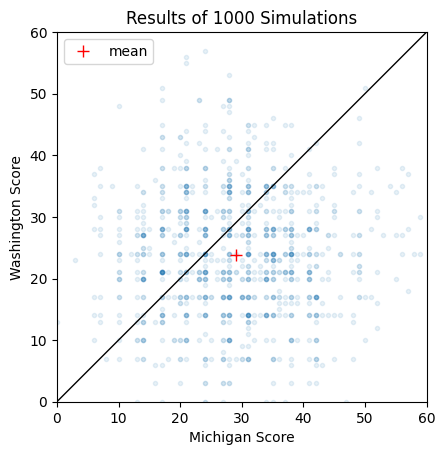

In [11]:
# Scatter plot the scores
plt.plot([0, 60], [0, 60], '-k', lw=1)
plt.scatter(um_points, uw_points, marker='.', alpha=0.1)
plt.plot(um_points.mean(), uw_points.mean(), 'r+', ms=8, label='mean')
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.gca().set_aspect(1.0)
plt.xlabel("Michigan Score")
plt.ylabel("Washington Score")
plt.legend()
_ = plt.title(f"Results of {num_games} Simulations")

According to our simulations, it looks like Michigan has the upper hand. Hail to the Victors! What is the simulated probability of Michigan winning?

In [12]:
print(f"Pr(Michigan wins): {torch.sum(um_points >= uw_points) / num_games: .2f}")

Pr(Michigan wins):  0.66


Now let's look at the simulated _spread_: the margin of victory.

E[spread] =  5.25


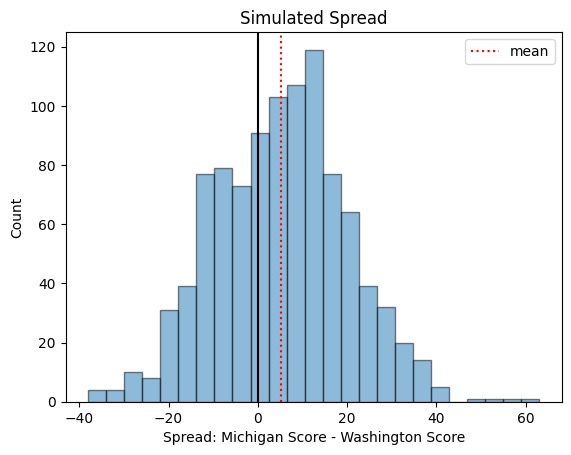

In [13]:
print(f"E[spread] = {torch.mean(um_points - uw_points) : .2f}")

plt.hist(um_points - uw_points, bins=25, alpha=.5, edgecolor='k')
plt.xlabel("Spread: Michigan Score - Washington Score")
plt.ylabel("Count")
plt.title("Simulated Spread")
plt.axvline(0, color='k')
plt.axvline(torch.mean(um_points - uw_points), color='r', ls=':', label='mean')
_ = plt.legend()

We can also look at the simulated _total score_ (this is the over/under bet).

E[total score] =  52.82


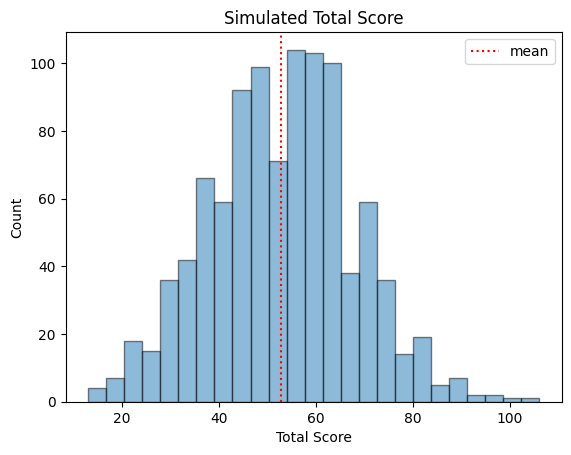

In [14]:
print(f"E[total score] = {torch.mean(um_points + uw_points): .2f}")

plt.hist(um_points + uw_points, bins=25, alpha=.5, edgecolor='k')
plt.xlabel("Total Score")
plt.ylabel("Count")
plt.title("Simulated Total Score")
plt.axvline(torch.mean(um_points + uw_points), color='r', ls=':', label='mean')
_ = plt.legend()

As of this writing, the pros have Michigan favored to win by 4.5 points with an over/under of 56.5 points. Our simulations show Michigan as 5.25 point favorites with an over/under of 52.8. We aren't too far off!

### Coming Full Circle

Finally, let's look at the simulated distribution of scores mod 10 and see if it's anything like the distribution from actual games this season.

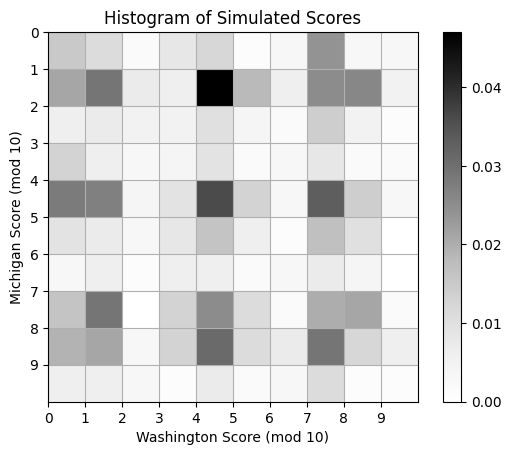

In [15]:
# Plot the histogram
sim_hist = torch.histogramdd(torch.column_stack([um_points, uw_points]) % 10, 
                             bins=10, range=[0, 10, 0, 10], density=True)

plt.imshow(sim_hist.hist, extent=(0, 10, 10, 0), cmap="Greys")
plt.xticks(torch.arange(10))
plt.yticks(torch.arange(10))
plt.xlabel("Washington Score (mod 10)")
plt.ylabel("Michigan Score (mod 10)")
plt.title(f"Histogram of Simulated Scores")
plt.grid(True)
_ = plt.colorbar()

Not too bad! It clearly picks up on 0, 1, 4, 7, and 8 as the most likely last digits. That trend was also apparent in the real scores.

## Conclusion

That's it! We've had our first taste of models and algorithms for discrete data. 
Though it may seem like a stretch to call a these basic distributions "models," that's exactly what they are. Likewise, the procedures we derived for computing the MLE of a Bernoulli distribution, constructing Wald confidence intervals, and Bayesian credible intervals are our first "algorithms." These will be our building blocks as we construct more sophisticated models and algorithms for more complex data. 

Next up: we'll look at _contingency tables_, which model joint distributions over pairs of categorical random variables, just like the tables we plotted above!